**Luiz Carlos Irber Jr**

ECS 253 - Network Theory

UC Davis

This document is available online at

https://github.com/luizirber/ecs253/blob/master/hw3/Homework%203.ipynb

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import numpy.linalg as LA

import networkx as nx

# Problem 1

## 1.1

### 1.1.1

In [2]:
adj = np.array([
    [0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 0, 1],
    [0, 0, 1, 1, 1, 0]], dtype='i')
adj

array([[0, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 1, 0]], dtype=int32)

Using networkx to draw the graph:

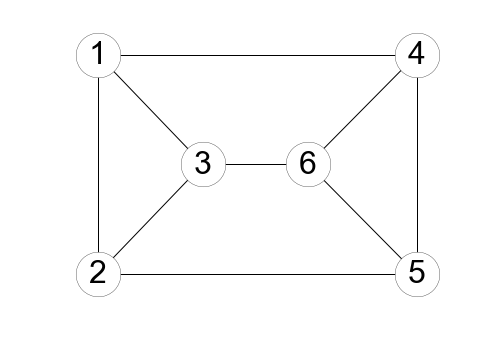

In [3]:
plt.axis("off")
g = nx.Graph(adj)
pos = {
  0: (0, 1),
  1: (0, 0),
  2: (.33, .5),
  3: (1, 1),
  4: (1, 0),
  5: (.66, .5)
}
nx.draw_networkx(g, pos=pos,
        labels={k:k+1 for k in range(len(adj))},
        node_size=2000, font_size=32,
        node_color="white",
        )

### 1.1.2

In [4]:
m = len(g.edges())
k = np.array(list(nx.degree(g).values()), dtype="i")
B = adj - (np.outer(k, k.T) / (2 * m))

In [5]:
B

array([[-0.5,  0.5,  0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5,  0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5, -0.5,  0.5],
       [ 0.5, -0.5, -0.5, -0.5,  0.5,  0.5],
       [-0.5,  0.5, -0.5,  0.5, -0.5,  0.5],
       [-0.5, -0.5,  0.5,  0.5,  0.5, -0.5]])

### 1.1.3

In [6]:
e_val, e_vec = LA.eig(B)
e_val

array([  1.00000000e+00,   5.55111512e-17,  -2.00000000e+00,
        -2.00000000e+00,   6.20421327e-18,  -2.42376661e-16])

### 1.1.4

In [7]:
largest_pos = np.argmax(e_val)
np.round(e_val[largest_pos])

1.0

In [8]:
v = e_vec[:, largest_pos]
v

array([ 0.40824829,  0.40824829,  0.40824829, -0.40824829, -0.40824829,
       -0.40824829])

### 1.1.5

The assignment looks reasonable. Here are the two communities:

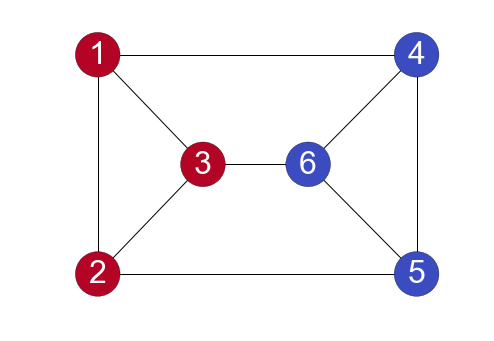

In [9]:
communities = v > 0

plt.axis("off")
nx.draw_networkx(g, pos=pos,
        labels={k:k+1 for k in range(len(adj))},
        node_size=2000, font_size=32,
        node_color=communities,
        font_color="white",
        cmap=matplotlib.cm.coolwarm
)

## 1.2

### 1.2.1

In [10]:
adj = np.array([
    [0, 5, 0, 1],
    [5, 0, 1, 0],
    [0, 1, 0, 5],
    [1, 0, 5, 0]], dtype=int)
adj

array([[0, 5, 0, 1],
       [5, 0, 1, 0],
       [0, 1, 0, 5],
       [1, 0, 5, 0]])

Using networkx to draw the graph:

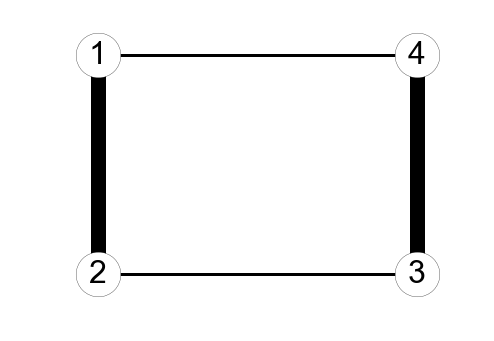

In [11]:
plt.axis("off")
G = nx.from_numpy_matrix(adj)
pos = {
  0: (0, 1),
  1: (0, 0),
  2: (1, 0),
  3: (1, 1),
}

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] == 5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] == 1]

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, 
                       node_color="white")
nx.draw_networkx_labels(G, pos,
        labels={k:k+1 for k in range(len(G))},
         font_size=32)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=15)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=3)

### 1.2.2

In [12]:
m = np.sum(adj) / 2
m

12.0

### 1.2.3

In [13]:
k = np.sum(adj, axis=1)
k

array([6, 6, 6, 6])

In [14]:
B = adj - (k * k.T) / (2 * m)
B

array([[-1.5,  3.5, -1.5, -0.5],
       [ 3.5, -1.5, -0.5, -1.5],
       [-1.5, -0.5, -1.5,  3.5],
       [-0.5, -1.5,  3.5, -1.5]])

### 1.2.4

In [15]:
e_val, e_vec = LA.eig(B)
e_val

array([  4.00000000e+00,   1.03541307e-17,  -6.00000000e+00,
        -4.00000000e+00])

### 1.2.5

In [16]:
largest_pos = np.argmax(e_val)
np.round(e_val[largest_pos])

4.0

In [17]:
v = e_vec[:, largest_pos]
v

array([ 0.5,  0.5, -0.5, -0.5])

### 1.2.6

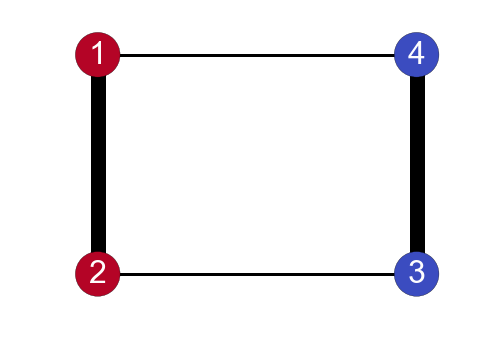

In [18]:
communities = v > 0

plt.axis("off")
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] == 5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] == 1]

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, 
                       node_color=communities,
                       cmap=matplotlib.cm.coolwarm)
nx.draw_networkx_labels(G, pos,
        labels={k:k+1 for k in range(len(G))},
        font_size=32,
        font_color="white")

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=15)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=3)

# Problem 2

## 2.1

In the user optimal behavior, the expected travel time is 1 hour (all the flow will be through the second road).
Since $x_1 = 1 - x_2$, we can parameterize the expected travel time per car as $\tau(x_2) = (1 - x_2) 1 + x_2 (0.25 + 0.75 x_2) = 0.75 x_2^2 - 0.75 x_2 + 1$

In [19]:
def T_1(x1):
    return 1

def T_2(x2):
    return .25 + .75 * x2

def τ(x2):
    return .75 * x2 ** 2 - .75 * x2 + 1

τ(1)

1.0

## 2.2

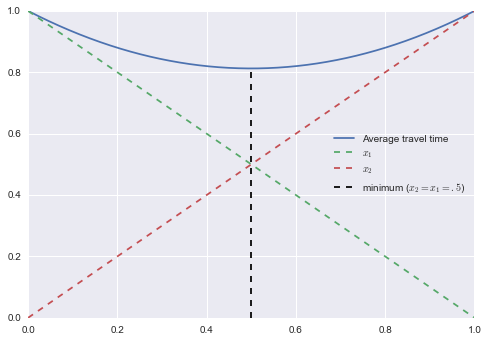

In [20]:
delta = 0.001
plt.plot(np.arange(0, 1, delta),
         [τ(x2) for x2 in np.arange(0, 1, delta)],
         label="Average travel time")
plt.plot(np.arange(0, 1, delta),
         1 - np.arange(0, 1, delta), '--',
         label="$x_1$")
plt.plot(np.arange(0, 1, delta),
         np.arange(0, 1, delta), '--',
         label="$x_2$")
plt.vlines(.5, 0, τ(.5), linestyle="--", label="minimum ($x_2=x_1=.5$)")
plt.legend(loc="best")

The flow is optimized when $x_1 = x_2 = .5$

Another way to calculate, instead of through graphical solving, is to calculate the first derivative and find where it is zero:

$\tau \prime(x_2) = 1.5x - 0.75$

$0 = 1.5x - 0.75$

$1.5x = 0.75$

$x = .5$

## 2.3

$\tau_m = \tau(0.5) = 0.8125$

In [21]:
τ(.5)

0.8125

In [22]:
np.min([τ(x2) for x2 in np.arange(0, 1, delta)])

0.8125